In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
def loadImages(dir):
    images = []
    for filename in os.listdir(dir):
        img = cv2.imread(os.path.join(dir,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append(img)
    return images

In [4]:
images = loadImages("../../test/dataset")

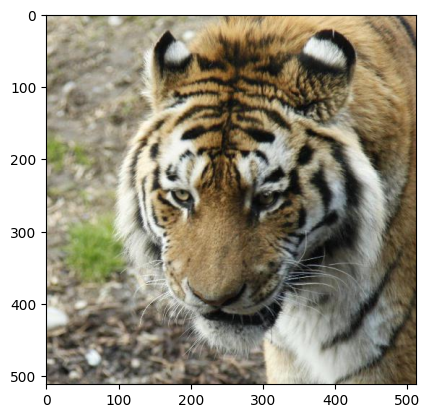

In [5]:
plt.imshow(images[0])

In [6]:
def rgb_to_hsv(r, g, b):
    r /= 255.0 
    g /= 255.0 
    b /= 255.0

    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax - cmin

    # Init
    h = -1
    s = -1
        
    if (cmax == cmin):
        h = 0
    elif (cmax == r):
        h = (60 * ((g - b) / delta) + 360) % 360
    elif (cmax == g):
        h = (60 * ((b - r) / delta) + 120) % 360
    else: # cmax == b
        h = (60 * ((r - g) / delta) + 240) % 360
    
    if (cmax == 0):
        s = 0
    else:
        s = (delta / cmax) * 100; 

    v = cmax * 100

    return h, s, v

In [7]:
for img in images:
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i, j, 0], img[i, j, 1], img[i, j, 2] = rgb_to_hsv(img[i, j, 0], img[i, j, 1], img[i, j, 2])

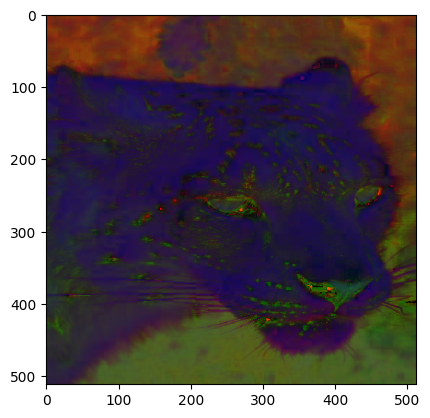

In [8]:
plt.imshow(images[1])